# Load Libraries

In [3]:
# Import necessary libraries
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical computing
import glob  # Library for file handling
import re  # Library for regular expressions
from tqdm import tqdm  # Library for creating progress bars

import plotly.graph_objects as go  # Library for creating interactive plots

# Preprocessing
from sklearn import preprocessing  # Library for data preprocessing

import matplotlib.pyplot as plt  # Library for basic data visualization
import h5py  # Library for handling large datasets
import datetime  # Library for date and time operations



**For preprocessing and modeling**
* sklearn.preprocessing is used for data preprocessing tasks, such as scaling or encoding categorical variables.
* keras is a deep learning library that provides tools for building and training neural networks.
* Sequential is a type of model in Keras that allows stacking layers sequentially.
* Dense represents a fully connected layer in a neural network.
* Dropout is used for regularization by randomly setting input units to 0 during training to prevent overfitting.
* Activation defines the activation function to introduce non-linearity in the neural network.
* LSTM is a type of recurrent neural network layer used for sequence modeling.
* load_model is used to load pre-trained models.
* matplotlib.pyplot is imported as plt for basic data visualization.
* h5py is used for handling large datasets stored in the Hierarchical Data Format (HDF5).
* datetime is used for handling date and time information.
* tensorflow is imported as tf, which is a deep learning library used for various operations.

In [5]:
# The code defines a function named plot that takes four parameters: df, x_feature_name,
# y_feature_name, and title. The function is designed to plot data from a dataframe
def plot(df,x_feature_name,y_feature_name,title):
    """
    This function takes two dataframes as input and plots the number of calls per day and per week.

    Args:
    daily_df (pandas.DataFrame): A dataframe containing daily call data.
    weekly_df (pandas.DataFrame): A dataframe containing weekly call data.

    Returns:
    None
    """

    # A new instance of the go.Figure() class from the plotly.graph_objects library is created. This will be used to create the plot
    fig = go.Figure()
    # Add a trace for daily calls
    # A trace is added to the figure using the go.Scatter() class from plotly.graph_objects. 
    # It specifies the x and y data for the plot, assigns a name to the trace, 
    # and sets the mode to display lines and markers.
    fig.add_trace(
        go.Scatter(
            x=df[x_feature_name],
            y=df[y_feature_name],
            name=y_feature_name,
            mode='lines+markers'
        ))

 

    # Update xaxis properties
    # The x-axis and y-axis titles are updated using the update_xaxes() and update_yaxes() methods of the figure object.
    fig.update_xaxes(title_text='Date')

    # Update yaxis properties
    fig.update_yaxes(title_text=y_feature_name)

    # Update title and height
    # The layout of the figure is updated using the update_layout() method. The title, height, and width of the plot are set.
    fig.update_layout(
        title=f'{title}',
        height=500,
        width=1200
    )

    # Show the plot
    # The plot is displayed using the show() method of the figure object.
    fig.show()

    # Write the plot to an HTML file
    # fig.write_html(f'Visualization/btc.html')
# Summary:
# The code defines a function plot() that takes in a dataframe (df), x-axis feature name (x_feature_name),
# y-axis feature name (y_feature_name), and a title. Inside the function, a plot is created using plotly.graph_objects. 
# The provided x and y data from the dataframe are added as a trace to the plot. 
# The x-axis and y-axis titles are updated, along with the plot title, height, and width. 
# The plot is then displayed using fig.show(). There is an optional commented-out line that suggests writing the plot to an HTML file.


In [6]:
# The code defines a function named downsample_dataframe that takes in three parameters: df (the DataFrame to be downsampled), 
# downsampling_frequency (the desired frequency to downsample the DataFrame to), 
# and fill_method (the method to use for filling missing values).
# The function aims to downsample the DataFrame and fill any missing value
def downsample_dataframe(df, downsampling_frequency, fill_method='mean'):
  """
  Downsamples a DataFrame and fills missing values.

  Args:
    df: The DataFrame to downsample.
    downsampling_frequency: The frequency to downsample the DataFrame to.
    fill_method: The method to use to fill missing values.

  Returns:
    The downsampled DataFrame.
  """

  # Convert the Timestamp column to a datetime object.
  # This line converts the 'Timestamp' column in the DataFrame to a datetime object using the pd.to_datetime() function from the pandas library.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])

  # Set the index of the DataFrame to the Timestamp column.
  # This line sets the 'Timestamp' column as the index of the DataFrame using the set_index() method
  df = df.set_index('Timestamp')

  # Fill the missing values.
  # This block of code fills the missing values in the DataFrame based on the specified fill_method. 
  # If fill_method is set to 'mean', the missing values are filled with the mean value of each 
  # column using the fillna() method and df.mean(). If fill_method is set to 'median', 
  # he missing values are filled with the median value of each column using df.median(). 
  # If an invalid fill_method is provided, a ValueError is raised
  if fill_method == 'mean':
    df = df.fillna(df.mean())
  elif fill_method == 'median':
    df = df.fillna(df.median())
  else:
    raise ValueError('Invalid fill_method: {}'.format(fill_method))

  # Downsample the DataFrame.
  # This line downsamples the DataFrame to the specified downsampling_frequency using the resample() method with 
  # downsampling_frequency as the argument. The mean() method is then applied to calculate the mean 
  # value for each downsampled interval. The resulting downsampled DataFrame is returned as the output of the function.
  df = df.resample(downsampling_frequency).mean()
  return df

# Summary:
# The code defines a function downsample_dataframe() that takes in a DataFrame, downsampling frequency, 
# and fill method. The function converts the 'Timestamp' column to a datetime object, sets it as the index, 
# fills missing values based on the specified fill method (mean or median), and then downsamples the DataFrame 
# to the desired frequency using the mean value within each downsampled interval. 
# The resulting downsampled DataFrame is returned as the output of the function




In [7]:
# These lines use the glob module to find all file paths that match the pattern 'GreenD_reduced_version_03/*.csv'. 
# The resulting file paths are stored in path_lists.
# Then, the file paths are sorted alphabetically and assigned to sorted_file_paths
path_lists = glob.glob('GreenD_reduced_version_03/'+'*.csv')
sorted_file_paths = sorted(path_lists)


# This code defines a function extract_digits that takes a string as input and 
# uses regular expressions (re.findall()) to extract digits from the string. 
# It returns the extracted digits as an integer if they exist, otherwise it returns 0.
# Then, the sorted() function is used with key=extract_digits to sort the file
# paths based on the digits extracted from each path. Finally, the sorted file paths are printed
def extract_digits(string):
    # Extract digits from the string using regular expression
    digits = re.findall(r'\d+', string)
    return int(digits[0]) if digits else 0

sorted_file_paths = sorted(path_lists, key=extract_digits)
print(sorted_file_paths)


# In this block of code, an empty list conct_list is created. Then, a loop is executed over each sorted
# file path using sorted_file_paths. Inside the loop, each CSV file is read using pd.read_csv(),
# and the 'Timestamp' column is converted to a datetime object using pd.to_datetime() w
# ith the utc=True parameter and unit='s' to indicate that the values are in Unix timestamp format. 
# The 'Timestamp' column is then formatted to a specific string format '%Y-%m-%d %H:%M:%S' 
# using the dt.strftime() function. The resulting dataframe is appended to the conct_list

conct_list = []
for path in tqdm(sorted_file_paths ,desc='processing'):
    
    data = pd.read_csv(path)
    data['Timestamp'] = pd.to_datetime(data['Timestamp'],utc=True,unit='s')#format='%Y-%m-%d %H-%M-%S')
    data['Timestamp'] = data['Timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
    conct_list.append(data)
    
# The !mkdir command creates a directory named 'Combined-Dataset-version-03' 
# if it doesn't already exist. Then, pd.concat() is used to concatenate all 
# the dataframes in conct_list along the rows, creating a single combined dataframe named df
!mkdir 'Combined-Dataset-version-03'
df = pd.concat(conct_list)


# Summary:
# The code reads multiple CSV files located in the 'GreenD_reduced_version_03/' directory. 
# The file paths are sorted in ascending order based on the digits extracted from each path using a custom function.
# Each file is then loaded into a dataframe, and the 'Timestamp' column is converted to a datetime object and formatted.
# The dataframes are appended to a list. A new directory named 'Combined-Dataset-version-03' is created,
# and all the dataframes in the list are concatenated into a single dataframe named df.

['GreenD_reduced_version_03/greend_dataset_466.csv', 'GreenD_reduced_version_03/greend_dataset_341.csv', 'GreenD_reduced_version_03/greend_dataset_137.csv', 'GreenD_reduced_version_03/greend_dataset_32.csv', 'GreenD_reduced_version_03/greend_dataset_370.csv', 'GreenD_reduced_version_03/greend_dataset_35.csv', 'GreenD_reduced_version_03/greend_dataset_180.csv', 'GreenD_reduced_version_03/greend_dataset_204.csv', 'GreenD_reduced_version_03/greend_dataset_114.csv', 'GreenD_reduced_version_03/greend_dataset_377.csv', 'GreenD_reduced_version_03/greend_dataset_338.csv', 'GreenD_reduced_version_03/greend_dataset_179.csv', 'GreenD_reduced_version_03/greend_dataset_363.csv', 'GreenD_reduced_version_03/greend_dataset_80.csv', 'GreenD_reduced_version_03/greend_dataset_78.csv', 'GreenD_reduced_version_03/greend_dataset_464.csv', 'GreenD_reduced_version_03/greend_dataset_74.csv', 'GreenD_reduced_version_03/greend_dataset_365.csv', 'GreenD_reduced_version_03/greend_dataset_387.csv', 'GreenD_reduced_

processing: 100%|██████████| 472/472 [00:32<00:00, 14.36it/s]


mkdir: cannot create directory ‘Combined-Dataset-version-03’: File exists


In [8]:
df.sort_values(by='Timestamp',inplace=True)
# This line of code sorts the DataFrame df based on the values in the 'Timestamp' column in ascending order. 
# The sort_values() function is used to perform the sorting operation. The by parameter specifies 
# the column to sort by, which in this case is 'Timestamp'. The inplace=True parameter is
# used to modify the DataFrame df in place, meaning the changes are applied directly to the DataFrame instead of creating a new sorted DataFrame

<Figure size 800x600 with 0 Axes>

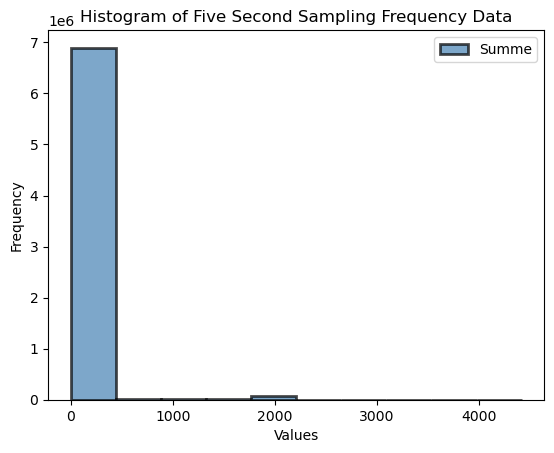

In [9]:
import matplotlib.pyplot as plt

# Customize the histogram plot
# This line creates a new figure object with a specific size of 8 inches by 6 inches. The figsize parameter is used to set the width and height of the figure in inches.
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the histogram
# This line plots a histogram using the plot.hist() method of the DataFrame df. It specifies the following parameters:

# bins=10: Sets the number of bins (bars) in the histogram to 10.
# edgecolor='black': Sets the color of the edges of the bars to black.
# alpha=0.7: Sets the transparency of the bars to 0.7 (partially transparent).
# color='steelblue': Sets the color of the bars to steel blue.
# linewidth=2: Sets the width of the bar edge lines to 2 pixels.
df.plot.hist(
    bins=10,                   # Number of bins
    edgecolor='black',         # Color of the edges of the bars
    alpha=0.7,                 # Transparency of the bars
    color='steelblue',         # Color of the bars
    linewidth=2,               # Width of the bar edge lines
)

# Customize the plot labels and title
plt.title('Histogram of Five Second Sampling Frequency Data')    # Set the title
plt.xlabel('Values')              # Set the x-axis label
plt.ylabel('Frequency')           # Set the y-axis label

# Show the plot
plt.savefig('5sec.png')

plt.show()

# Summary:
# The code creates a histogram plot using the plot.hist() method of the DataFrame df. 
# It customizes the plot by specifying the number of bins, edge color, transparency, 
# bar color, and line width. The plot is given a title, x-axis label, and y-axis label. 
# The resulting plot is saved as an image file named '5sec.png', and then it is displayed on the screen

In [10]:

# Downsample the DataFrame to 1-hour frequency and fill missing values using mean imputation.
# df_1_hour = downsample_dataframe(df, '1H', fill_method='mean'): The downsample_dataframe() function is called to downsample the DataFrame df to a 1-hour frequency and fill missing values using mean imputation. The resulting downsampled DataFrame is assigned to the variable df_1_hour.
# df_1_hour.reset_index('Timestamp', inplace=True): The index of the DataFrame df_1_hour is reset, converting the 'Timestamp' column from the index back to a regular column. The reset_index() method is used, and the inplace=True parameter is set to modify the DataFrame in place.
# df_1_hour.fillna(method='ffill', inplace=True): Missing values in the DataFrame df_1_hour are filled using forward fill (ffill) method, which propagates the last observed value forward. The fillna() method is used, and the inplace=True parameter is set to modify the DataFrame in place

df_1_hour = downsample_dataframe(df, '1H', fill_method='mean')
df_1_hour.reset_index('Timestamp',inplace=True)
df_1_hour.fillna(method='ffill',inplace=True)


# df_daily = downsample_dataframe(df, '24H', fill_method='mean'): The downsample_dataframe() function is called to downsample the DataFrame df to a daily frequency (24 hours) and fill missing values using mean imputation. The resulting downsampled DataFrame is assigned to the variable df_daily.
# df_daily.reset_index('Timestamp', inplace=True): The index of the DataFrame df_daily is reset, converting the 'Timestamp' column from the index back to a regular column. The reset_index() method is used, and the inplace=True parameter is set to modify the DataFrame in place.
# df_daily.fillna(method='ffill', inplace=True): Missing values in the DataFrame df_daily are filled using forward fill (ffill) method, which propagates the last observed value forward. The fillna() method is used, and the inplace=True parameter is set to modify the DataFrame in place.
# Downsample the DataFrame to 1-hour frequency and fill missing values using mean imputation.
df_daily = downsample_dataframe(df, '24H', fill_method='mean')
df_daily.reset_index('Timestamp',inplace=True)
df_daily.fillna(method='ffill',inplace=True)

# Summary:
# The code performs downsampling of the original DataFrame df to different 
# frequencies (1-hour and daily) using the downsample_dataframe() function.
# Missing values are filled using mean imputation, and the resulting downsampled
# DataFrames (df_1_hour and df_daily) are modified in place to reset the index and fill missing values using forward fill.

<Figure size 800x600 with 0 Axes>

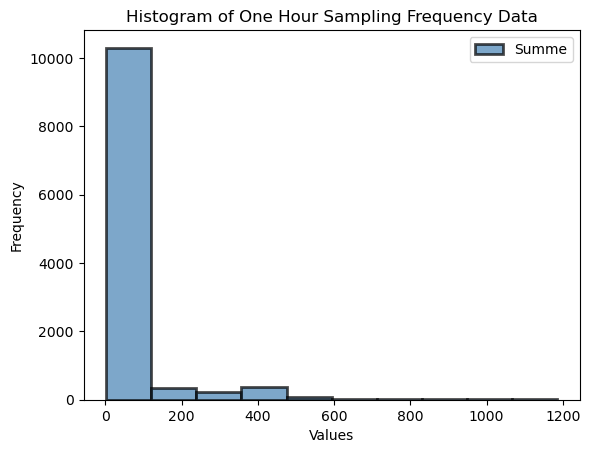

In [11]:
import matplotlib.pyplot as plt

# Customize the histogram plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the histogram
df_1_hour.plot.hist(
    bins=10,                   # Number of bins
    edgecolor='black',         # Color of the edges of the bars
    alpha=0.7,                 # Transparency of the bars
    color='steelblue',         # Color of the bars
    linewidth=2,               # Width of the bar edge lines
)

# Customize the plot labels and title
plt.title('Histogram of One Hour Sampling Frequency Data')    # Set the title
plt.xlabel('Values')              # Set the x-axis label
plt.ylabel('Frequency')           # Set the y-axis label

# Show the plot
plt.savefig('1-Hours.png')

plt.show()
# Summary:
# The code creates a histogram plot using the plot.hist() method of the DataFrame df_1_hour. 
# It customizes the plot by specifying the number of bins, edge color, transparency, 
# bar color, and line width. The plot is given a title, x-axis label, and y-axis label. 
# The resulting plot is saved as an image file named '1-Hours.png', and then it is displayed on the screen.

In [14]:
df_1_hour

,Timestamp,Summe
0,2014-03-12 07:00:00,66.321410
1,2014-03-12 08:00:00,14.977094
2,2014-03-12 09:00:00,27.099825
3,2014-03-12 10:00:00,14.787116
4,2014-03-12 11:00:00,27.785160
...,...,...
11386,2015-06-29 17:00:00,80.591582
11387,2015-06-29 18:00:00,52.420814
11388,2015-06-29 19:00:00,46.189453
11389,2015-06-29 20:00:00,58.697892


Shape of training data :  (7290, 1)
Shape of validation data :  (1823, 1)
Shape of testing data :  (2278, 1)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 1.8 K 
4 | V             | Linear           | 21    
---------------------------------------------------
1.9 K     Trainable params
0         Non-trainable params
1.9 K     Total params
0.007     Total estimated model params size (MB)


Shape of training data :  (7290, 1)
Shape of validation data :  (1823, 1)
Shape of testing data :  (2278, 1)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

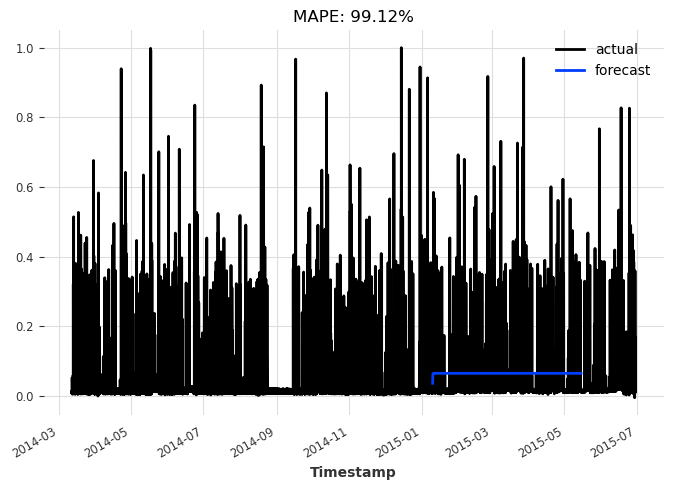

In [115]:
import torch

from darts import TimeSeries
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm
from darts.models import RNNModel
import logging
from darts.dataprocessing.transformers import Scaler
from pytorch_lightning.callbacks.early_stopping import EarlyStopping


# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df_1_hour, "Timestamp", "Summe",freq='1H',fill_missing_dates=True)

# Set aside the last 36 months as a validation series
train, testing = series.split_after(0.80)
training ,validation =  train.split_after(0.80)

print('Shape of training data : ',training.pd_dataframe().shape)
print('Shape of validation data : ',validation.pd_dataframe().shape)
print('Shape of testing data : ',testing.pd_dataframe().shape)

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(training)
val_transformed = transformer.transform(validation)
series_transformed = transformer.transform(series)


#stop training when validation loss does not decrease more than 0.05 (`min_delta`) over
# a period of 5 epochs (`patience`)
my_stopper = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.05,
    mode='min',
)

my_model = RNNModel(
    model="LSTM",
    hidden_dim=20,
    dropout=0,
    loss_fn =  torch.nn.MSELoss(),
    batch_size=16,
    n_epochs=300,
    optimizer_kwargs={"lr": 1e-3},
    model_name="electricity_Forecasting",
    log_tensorboard=True,
    random_state=42,
    training_length=20,
    input_chunk_length=100,
    force_reset=True,
    save_checkpoints=True,
    pl_trainer_kwargs={"callbacks": [my_stopper]}

)

my_model.fit(
    train_transformed,
    # future_covariates=covariates,
    val_series=val_transformed,
    # val_future_covariates=covariates,
    verbose=True,
)

from darts.metrics import mape

def eval_model(model):
    pred_series = model.predict(n=3000)
    plt.figure(figsize=(8, 5))
    series_transformed.plot(label="actual")
    pred_series.plot(label="forecast")
    plt.title("MAPE: {:.2f}%".format(mape(pred_series, val_transformed)))
    plt.legend()


eval_model(my_model)

<AxesSubplot:xlabel='Timestamp'>

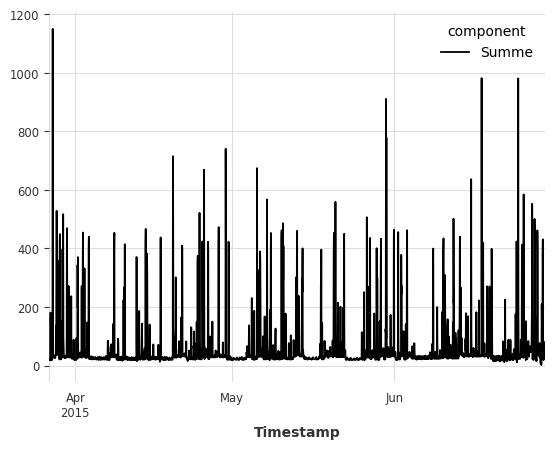

In [46]:
testing.pd_dataframe().plot()

In [116]:
import numpy as np
import plotly.graph_objects as go

def plot_actual_vs_predicted(input_data, actual, predicted):
    # Create the plot
    fig = go.Figure()

    # Add input data trace
    fig.add_trace(go.Scatter(x=np.arange(len(input_data)), y=input_data, name='Input Data'))

    # Add actual values trace
    fig.add_trace(go.Scatter(x=np.arange(len(actual)), y=actual, name='Actual'))

    # Add predicted values trace
    fig.add_trace(go.Scatter(x=np.arange(len(predicted)), y=predicted, name='Predicted'))

    # Configure the layout
    fig.update_layout(title='Actual vs. Predicted',
                      xaxis_title='Time',
                      yaxis_title='Value')

    # Show the plot
    fig.show()


In [117]:
# ... previous code ...

# Predict on the testing data
test_transformed = transformer.transform(testing)
input_data =  test_transformed[0:100]
test_pred = my_model.predict(n=24,series =input_data)


# Inverse transform the predictions and actual values
test_pred = transformer.inverse_transform(test_pred)
actual_values = testing.univariate_values()


actual  = testing[100:124].univariate_values()
predicted = test_pred.univariate_values()
input_data_fitted = transformer.inverse_transform(input_data).univariate_values()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

In [118]:
plot_actual_vs_predicted(input_data_fitted,actual,predicted)

/home/iffi/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: x and y can be no greater than 2D, but have shapes (24,) and (24, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

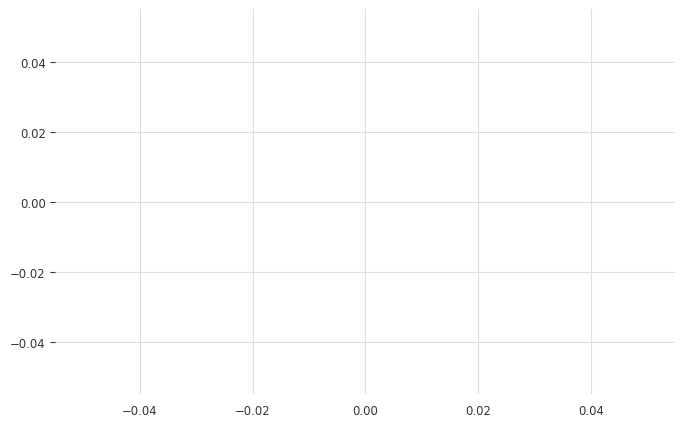

In [59]:

# Plot the predictions and actual values
plt.figure(figsize=(8, 5))
plt.plot(testing[100:24], label="Actual")
plt.plot(test_pred, label="Forecast")
plt.title("Testing Data - Actual vs Forecast")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()
